In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kruskal
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Lading dataset, checking its structure and basic statistics

In [2]:
dataset = pd.read_csv('data/used_car_dataset.csv')
dataset

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,gas,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,gas,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,gas,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,gas,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,gas,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,18924.0,2017.0,ford,good,4 cylinders,gas,122612.0,automatic,sedan,silver,3588,2.202934,0.212334,b
9993,4248.0,2002.0,ford,like new,6 cylinders,gas,NaN,automatic,sedan,silver,157,2.147843,0.070923,a
9994,26269.0,2017.0,ford,excellent,6 cylinders,gas,52541.0,automatic,SUV,white,1499,2.392569,0.094751,c
9995,6149.0,2013.0,ford,good,4 cylinders,gas,197000.0,automatic,SUV,black,180,2.269796,0.129762,a


In [3]:
dataset.describe()

,price,year,odometer,F1,F2,F3
count,9997.000000,9997.000000,9.331000e+03,9997.000000,9997.000000,9997.000000
mean,14262.349305,2009.814144,1.120436e+05,1523.945584,2.225496,0.099283
std,12520.818169,8.862341,8.055942e+04,2090.438720,0.227250,0.100833
min,0.000000,1922.000000,0.000000e+00,4.000000,0.167352,-0.313948
25%,5643.000000,2007.000000,6.653300e+04,311.000000,2.133806,0.029968
50%,10463.000000,2012.000000,1.100000e+05,717.000000,2.255670,0.099648
75%,19464.000000,2015.000000,1.500000e+05,1966.000000,2.362382,0.167504
max,402498.000000,2021.000000,2.074484e+06,36773.000000,2.742570,0.473412


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9331 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [5]:
print("Number of unique values in each column:")
print(dataset.nunique())

Number of unique values in each column:
price           8174
year              89
manufacturer       2
condition          4
cylinders          3
fuel               1
odometer        4681
transmission       2
type               4
paint_color        5
F1              2931
F2              9997
F3              9997
F4                 3
dtype: int64


In [6]:
print(dataset.isnull().sum())

price             0
year              0
manufacturer      0
condition         0
cylinders         0
fuel              0
odometer        666
transmission      0
type              0
paint_color       0
F1                0
F2                0
F3                0
F4                0
dtype: int64


All vehicles have fuel type 'gas' so we can remove this column.

In [7]:
dataset = dataset.drop(columns=['fuel'])
dataset.head()

,price,year,manufacturer,condition,cylinders,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,18219.0,2008.0,ford,excellent,8 cylinders,86238.0,automatic,pickup,black,5823,2.193844,-0.031986,b
1,800.0,2008.0,ford,excellent,6 cylinders,170953.0,automatic,SUV,red,2024,2.133691,0.097985,b
2,23660.0,2016.0,ford,good,8 cylinders,119026.0,automatic,truck,white,294,2.160859,0.046984,c
3,5335.0,2009.0,ford,excellent,4 cylinders,69000.0,manual,sedan,blue,3544,2.114929,-0.110121,c
4,1597.0,1999.0,ford,good,6 cylinders,59130.0,automatic,sedan,blue,1329,1.829625,-0.060615,c


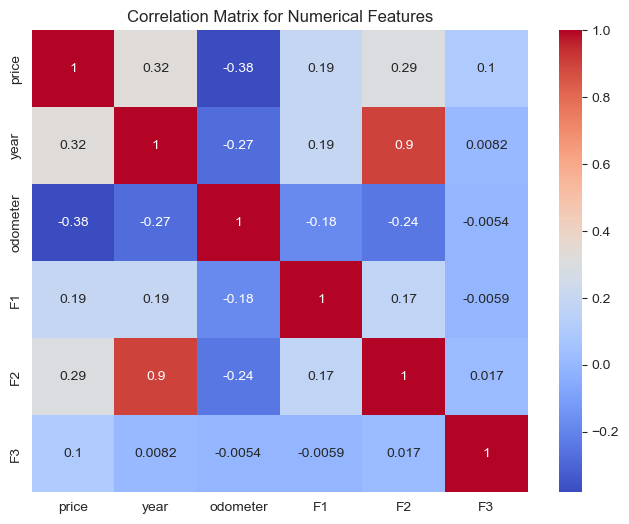

In [8]:
num_cols = ['price', 'year', 'odometer', 'F1', 'F2', 'F3']

corr = dataset[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [9]:
# Compute correlations with price
correlations = dataset[['F1', 'F2', 'F3', 'price']].corr()
print(correlations['price'][['F1', 'F2', 'F3']])

F1    0.192230
F2    0.293957
F3    0.099625
Name: price, dtype: float64


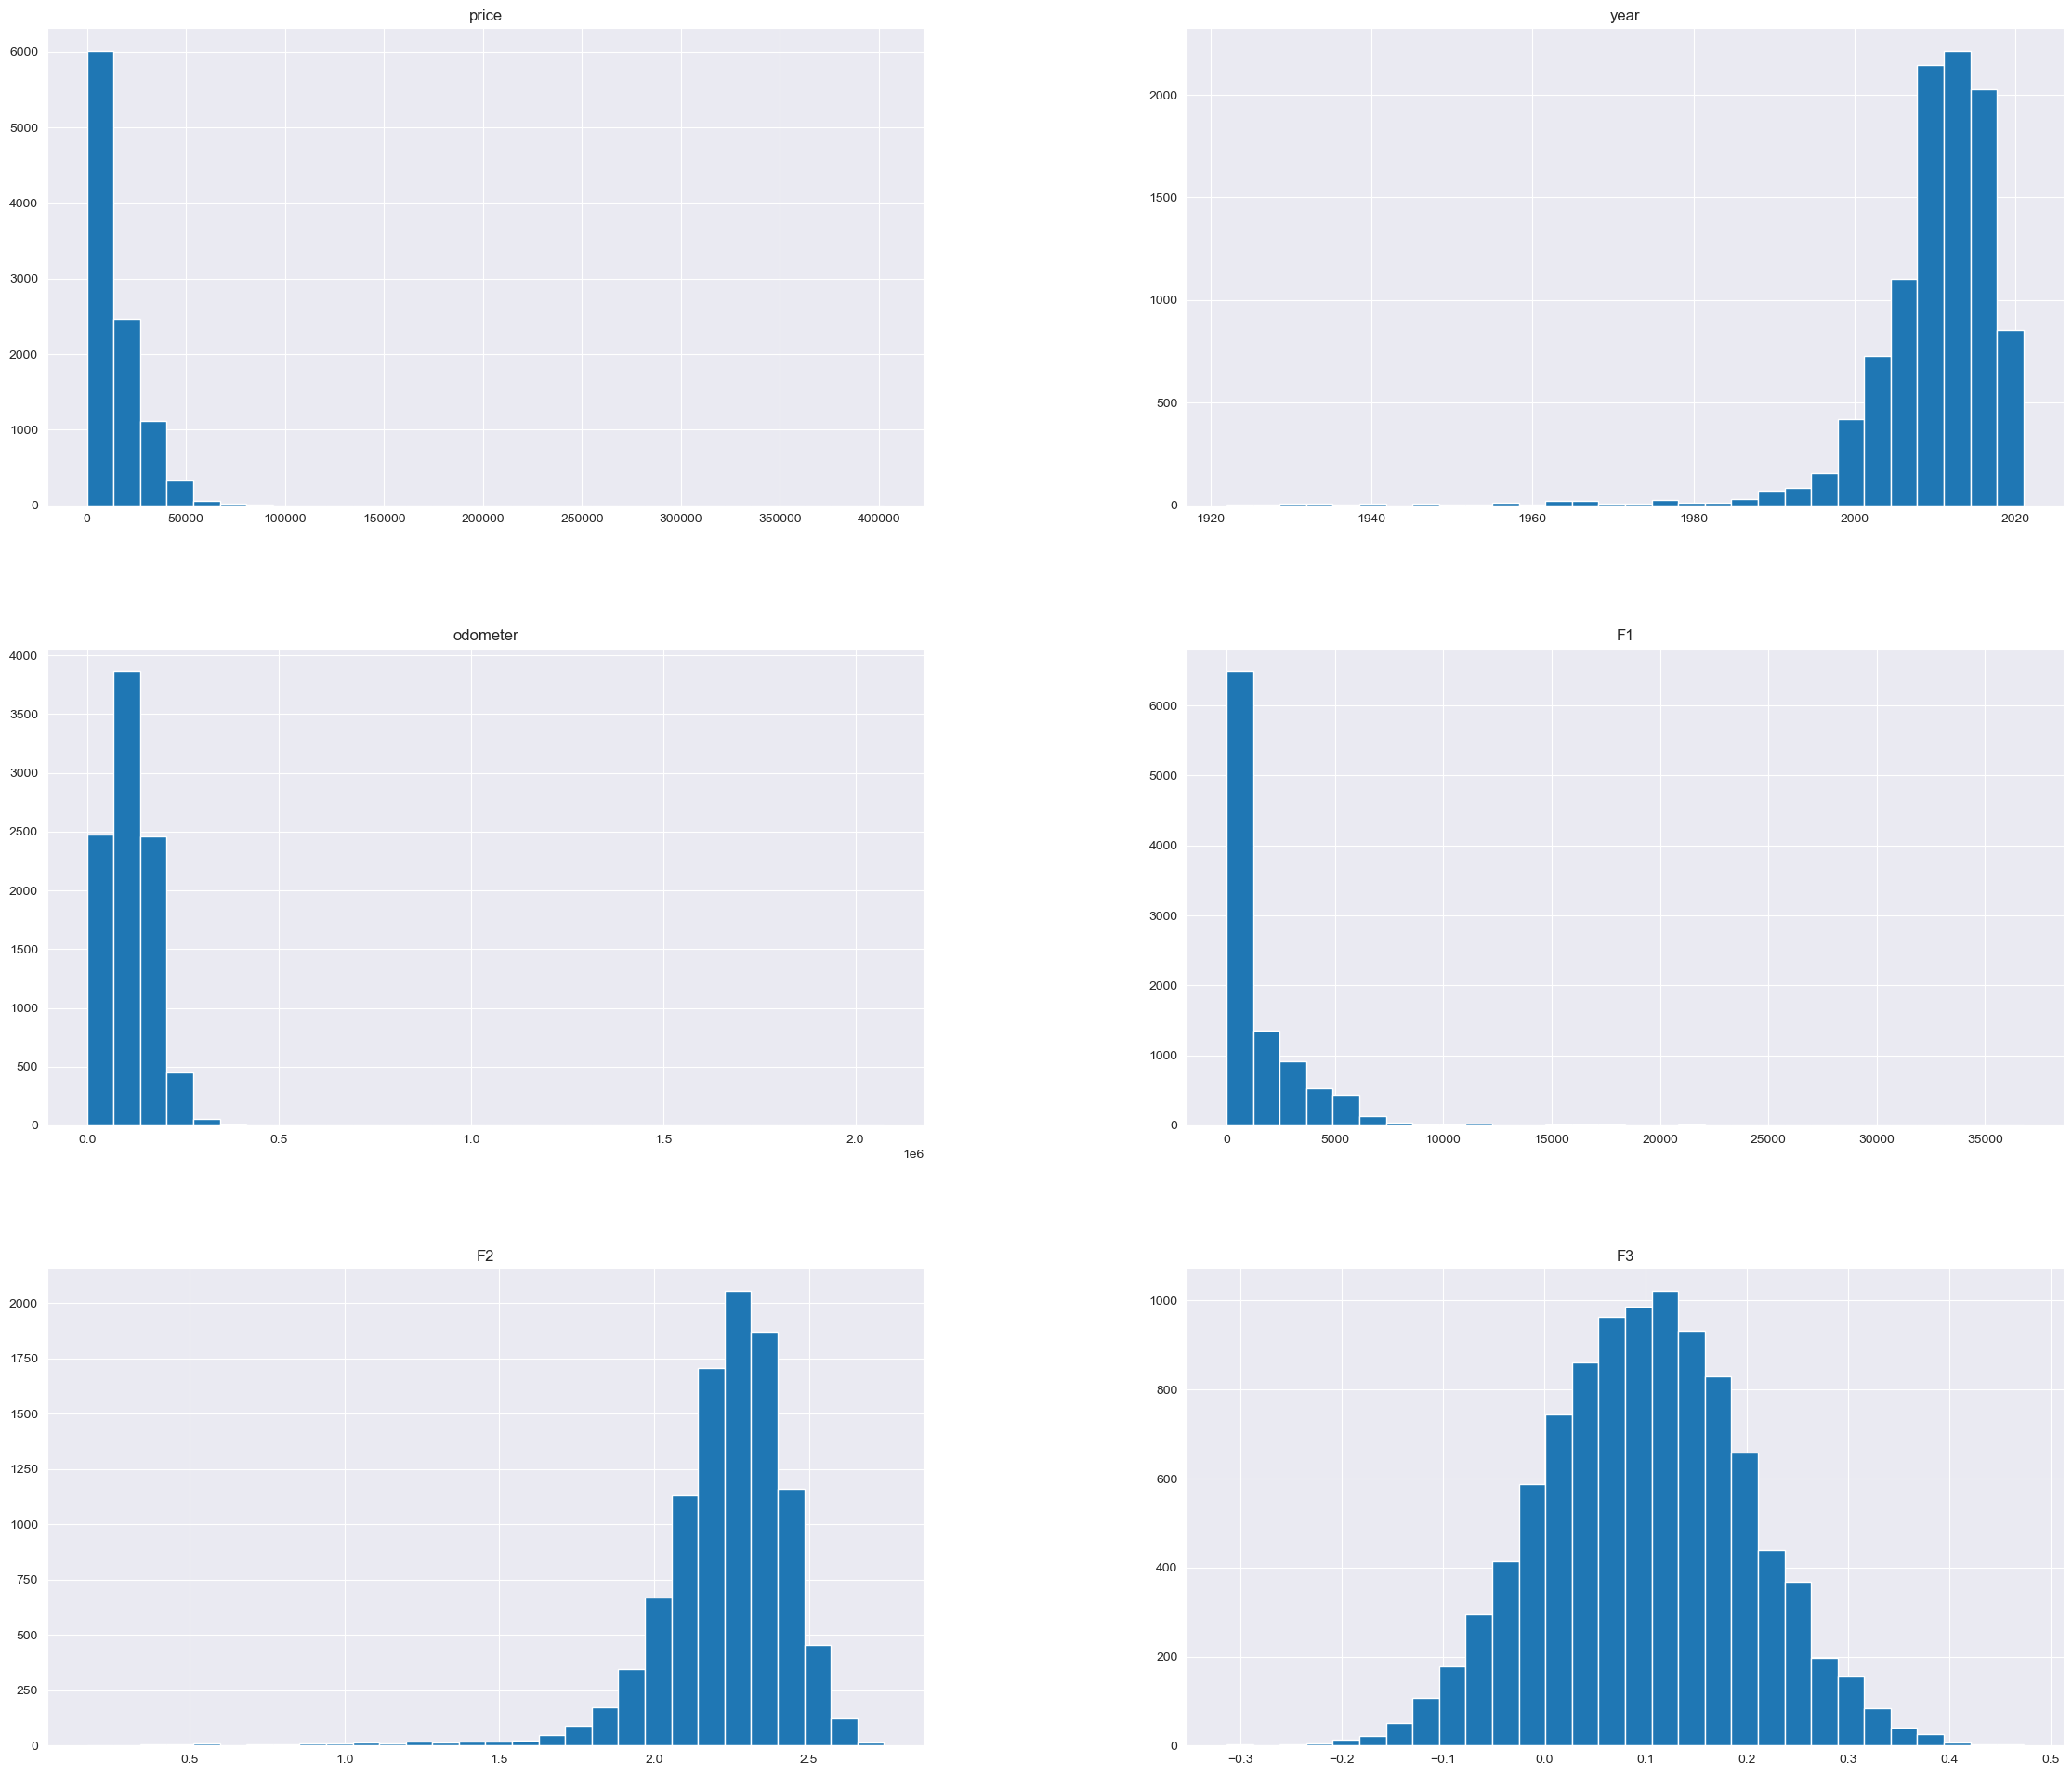

In [10]:
dataset[['price', 'year', 'odometer', 'F1', 'F2', 'F3']].hist(bins=30, figsize=(28, 24))
plt.show()

# Dataset analysis, removing outliers, checking features impact on price

## Price vs. Year

Based on below analysis price 402498 could be an outlier (mistake made by the user). With that assumption let's remove it from dataset.

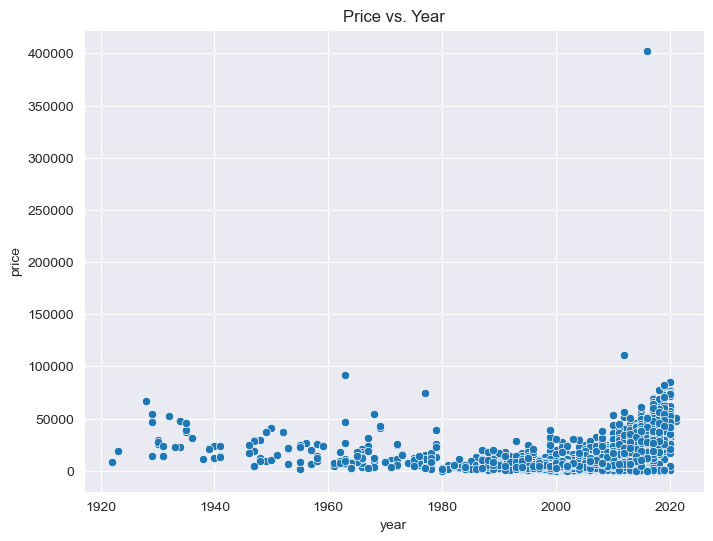

         price    year manufacturer  condition    cylinders  odometer  \
7051  402498.0  2016.0         ford  excellent  6 cylinders   59000.0   

     transmission    type paint_color   F1        F2        F3 F4  
7051    automatic  pickup       black  155  2.443044  0.166662  c  


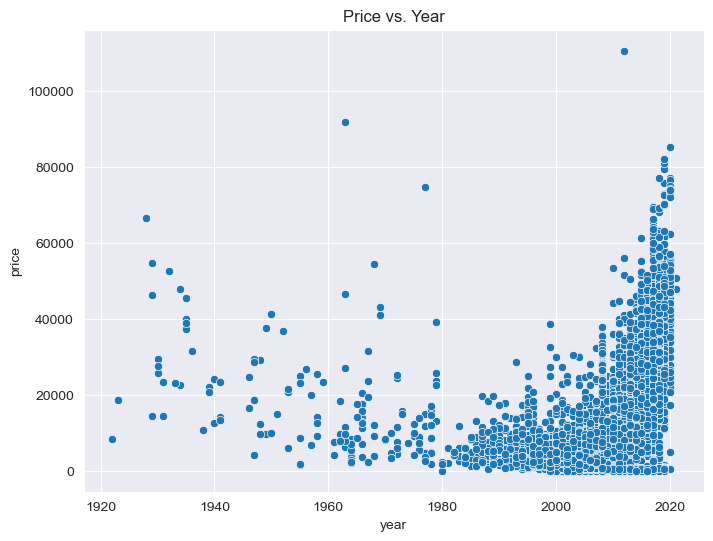

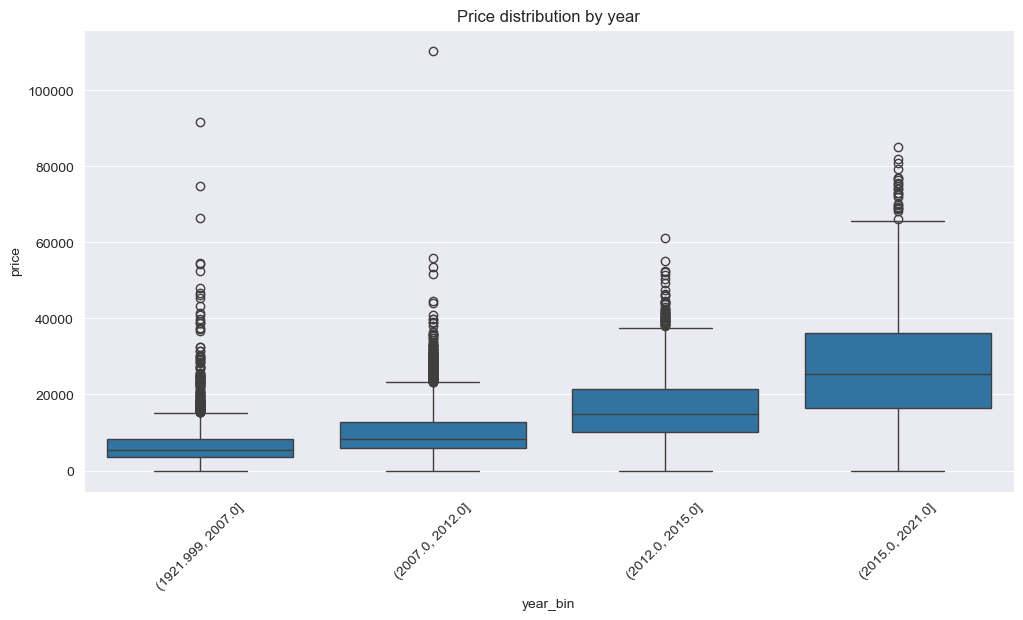

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='price', data=dataset)
plt.title("Price vs. Year")
plt.show()

print(dataset.loc[dataset['price'] > 300000])

dataset = dataset[dataset['price'] < 300000]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='price', data=dataset)
plt.title("Price vs. Year")
plt.show()

dataset['year_bin'] = pd.qcut(dataset['year'], q=4,)
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_bin', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by year')
plt.show()

## Price vs, Manufacturer

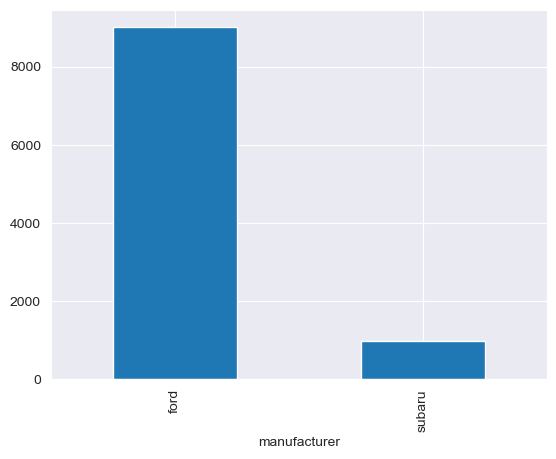

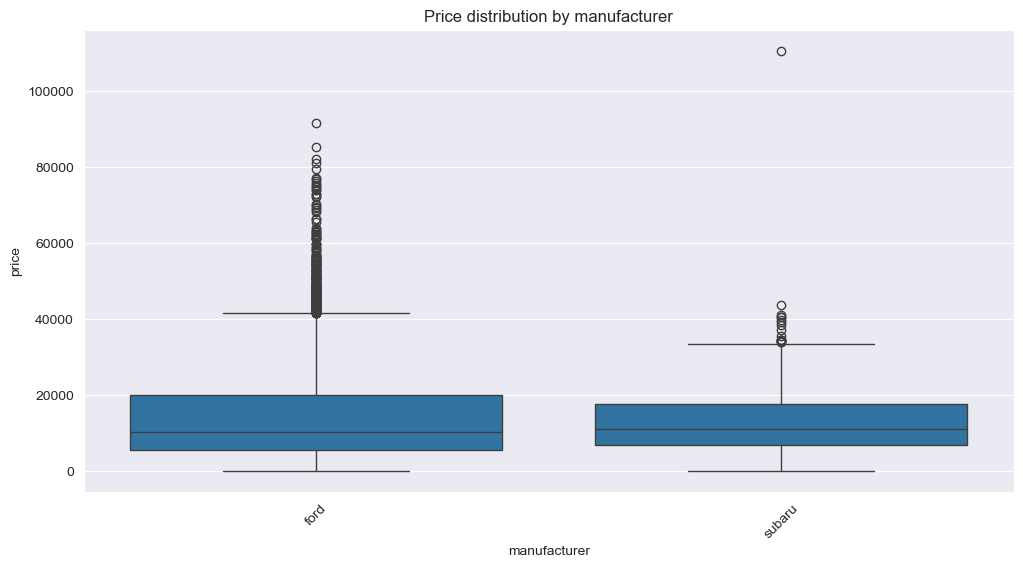

Kruskal-Wallis H-statistic: 2.5251735166388527, p-value: 0.11204245535986707


In [12]:
dataset['manufacturer'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by manufacturer')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('manufacturer')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

## Price vs. Color

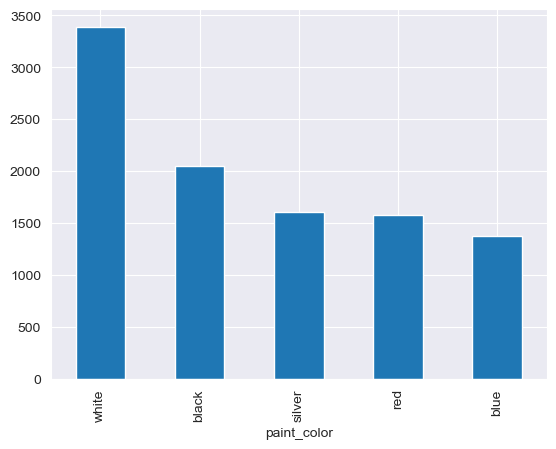

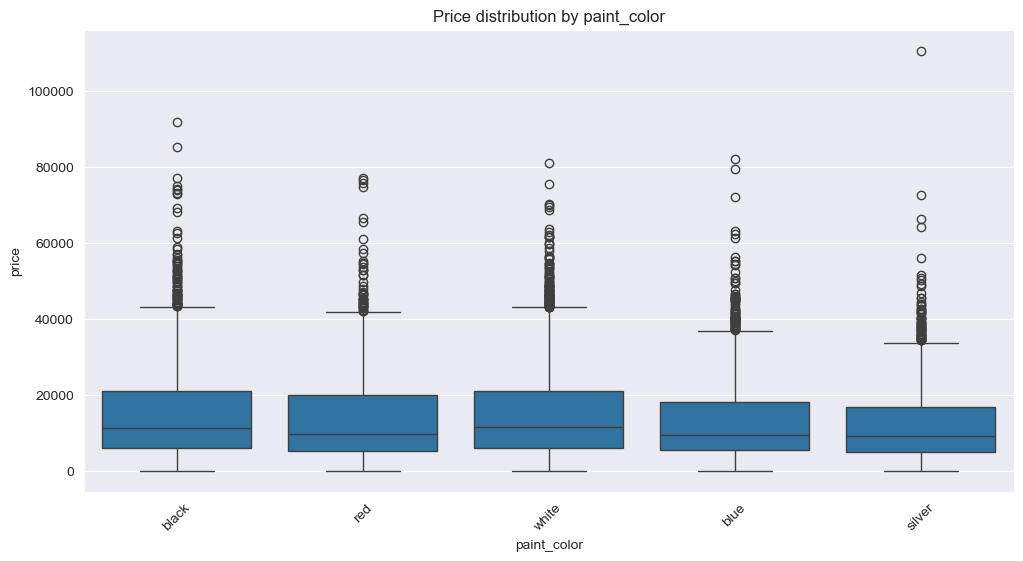

Kruskal-Wallis H-statistic: 66.49383279052293, p-value: 1.2464335858555777e-13


In [13]:
dataset['paint_color'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='paint_color', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by paint_color')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('paint_color')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

Based on above analysis paint_color has impact on price. For example black and white cars are slightly more expensive than other colors.

Low value of Kruskal-Wallis H-statistic: 6.577461498285556, and relatively close to threshold 0.05 p-value: 0.03730116389713022 suggest that F3 factor doesn't have significant impact on price.

## Price vs. Type

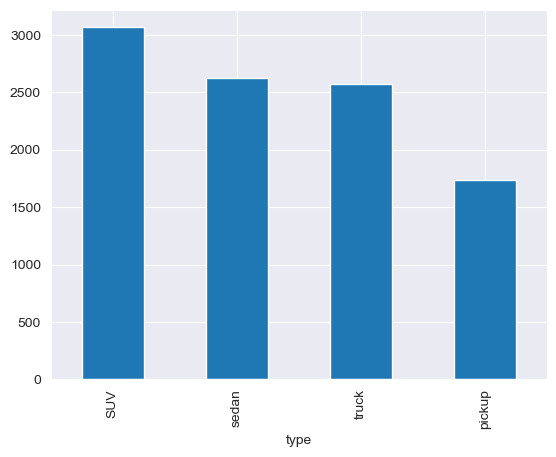

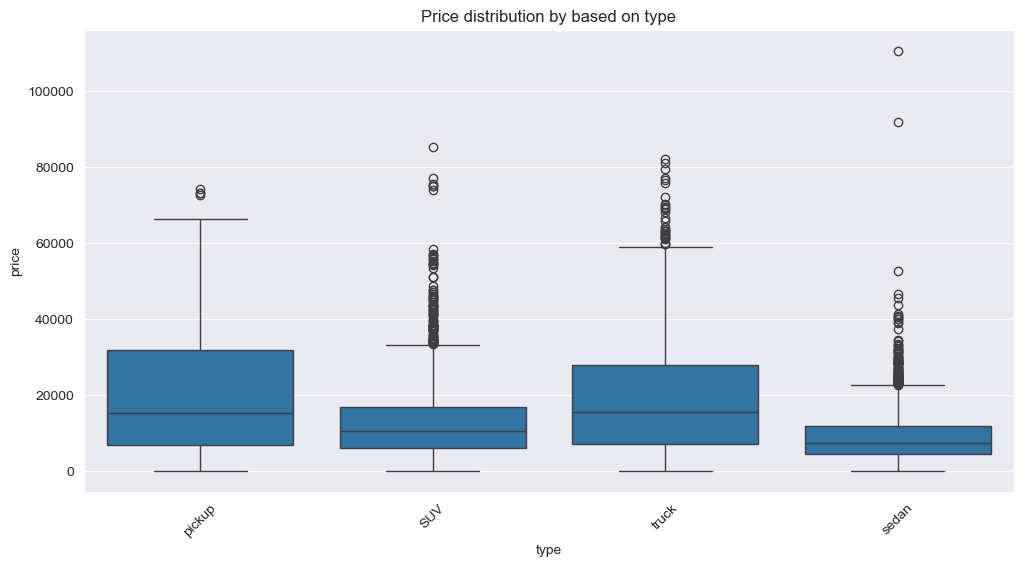

Kruskal-Wallis H-statistic: 922.7856173004791, p-value: 1.0106704195026539e-199


In [14]:
dataset['type'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by based on type')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('type')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

## Price vs. Transmission

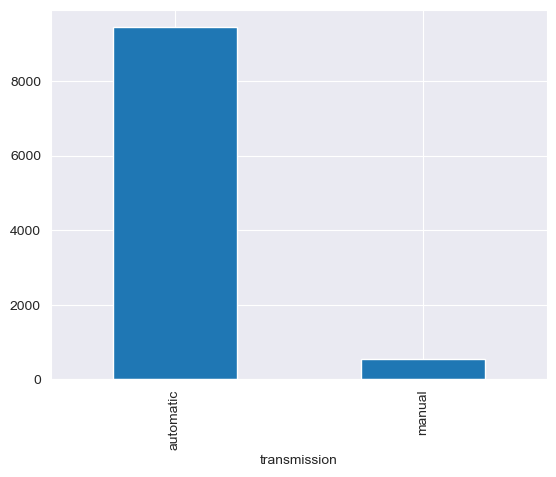

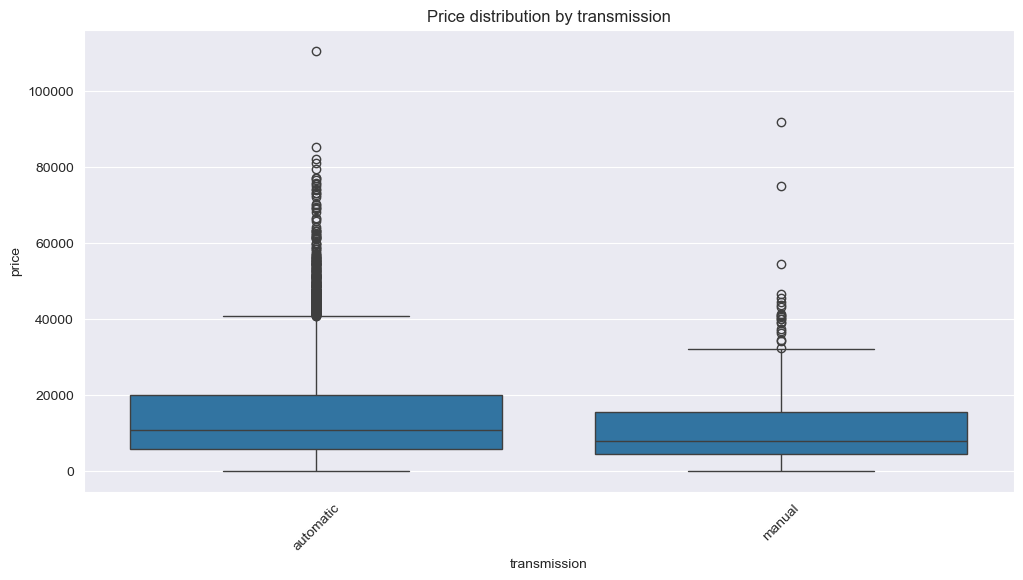

Kruskal-Wallis H-statistic: 46.774450154661125, p-value: 7.964503218105317e-12


In [15]:
dataset['transmission'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='transmission', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by transmission')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('transmission')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

## Price vs. F1

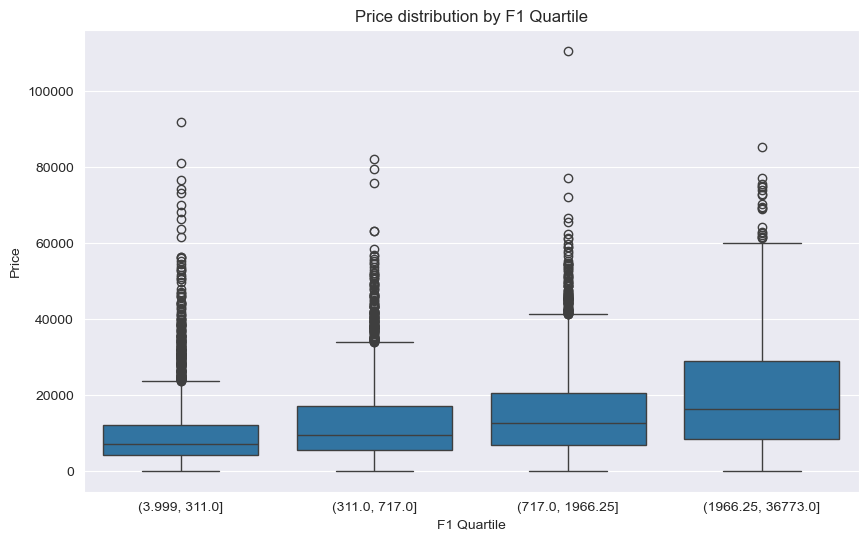

In [16]:
dataset['F1_bin'] = pd.qcut(dataset['F1'], q=4,)
plt.figure(figsize=(10, 6))
sns.boxplot(x='F1_bin', y='price', data=dataset)
plt.title('Price distribution by F1 Quartile')
plt.xlabel('F1 Quartile')
plt.ylabel('Price')
plt.show()

## Price vs. F2

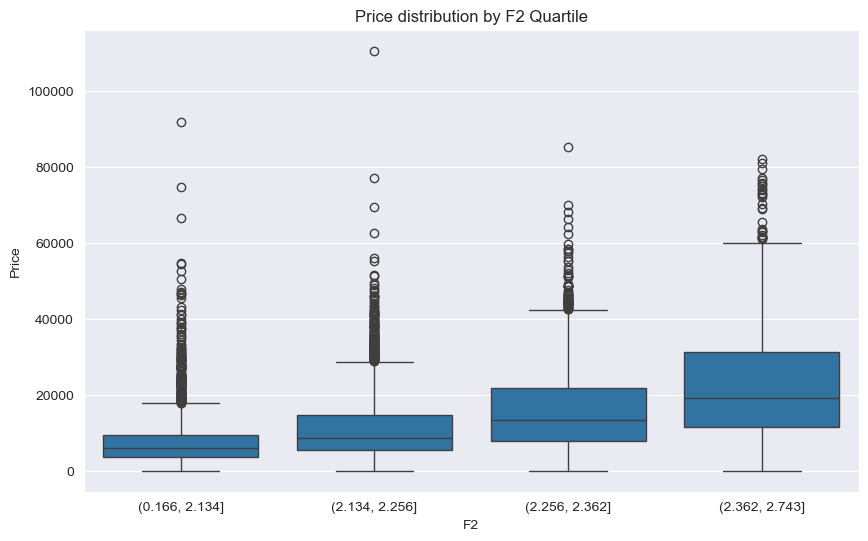

In [17]:
dataset['F2_bin'] = pd.qcut(dataset['F2'], q=4,)

plt.figure(figsize=(10, 6))
sns.boxplot(x='F2_bin', y='price', data=dataset)
plt.title('Price distribution by F2 Quartile')
plt.xlabel('F2')
plt.ylabel('Price')
plt.show()

## Price vs. F3

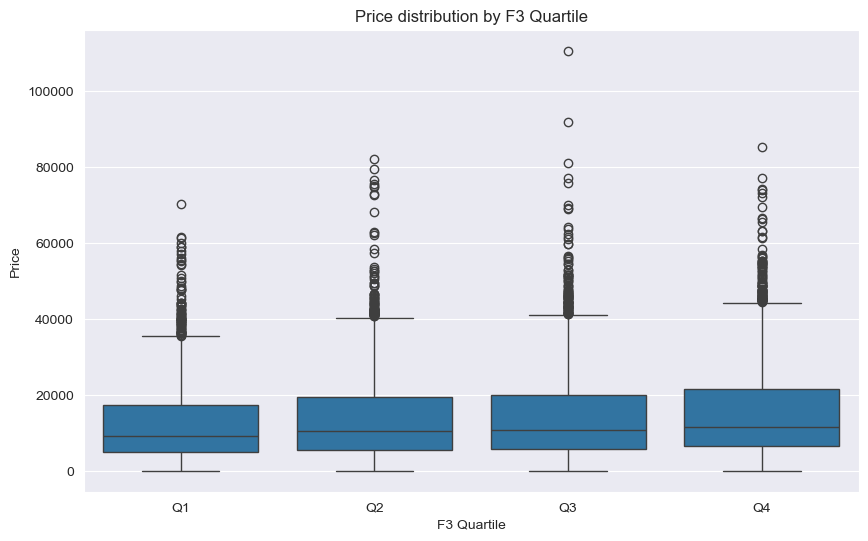

In [18]:
dataset['F3_bin'] = pd.qcut(dataset['F3'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='F3_bin', y='price', data=dataset)
plt.title('Price distribution by F3 Quartile')
plt.xlabel('F3 Quartile')
plt.ylabel('Price')
plt.show()

## Price vs. F4

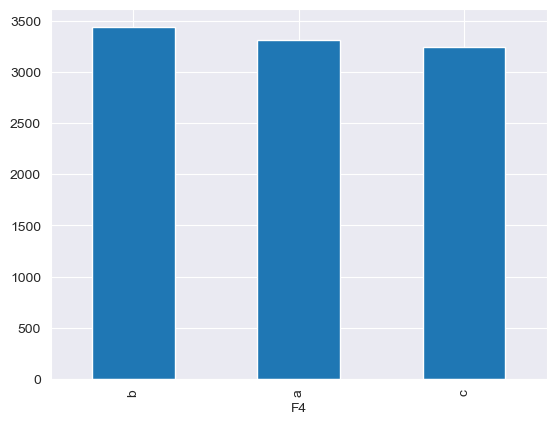

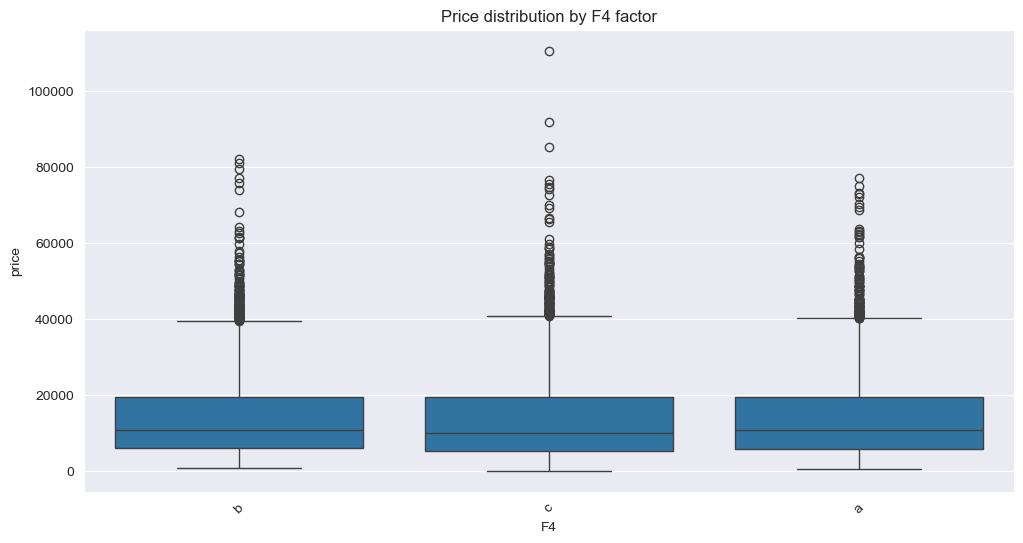

Kruskal-Wallis H-statistic: 6.577461498285556, p-value: 0.03730116389713022


In [19]:
dataset['F4'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='F4', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by F4 factor')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('F4')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

## Price vs. Odometer

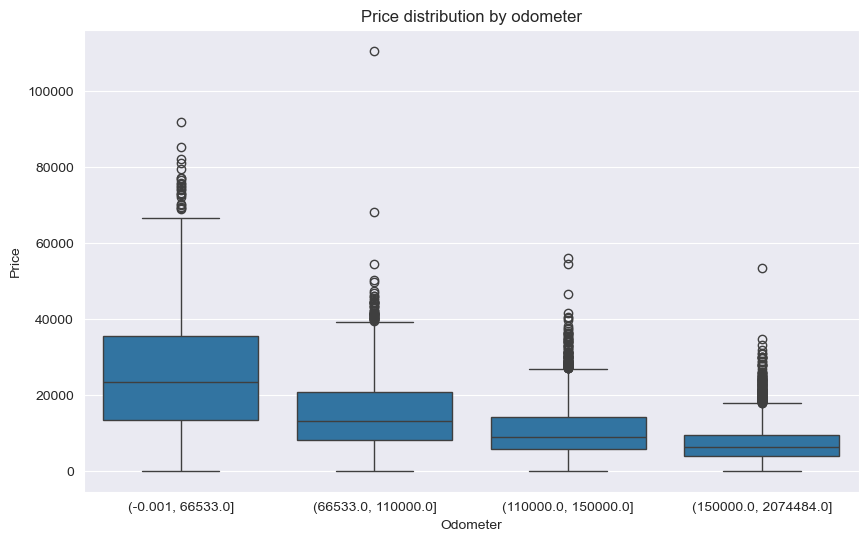

In [39]:
dataset['odometer_bin'] = pd.qcut(dataset['odometer'], q=4,)

plt.figure(figsize=(10, 6))
sns.boxplot(x='odometer_bin', y='price', data=dataset)
plt.title('Price distribution by odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

 ## Price vs. Cylinders

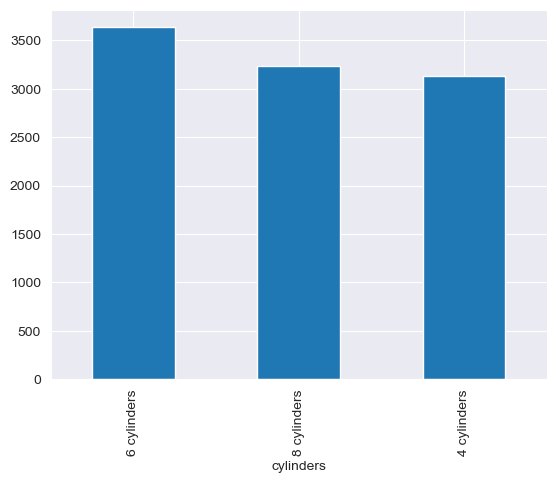

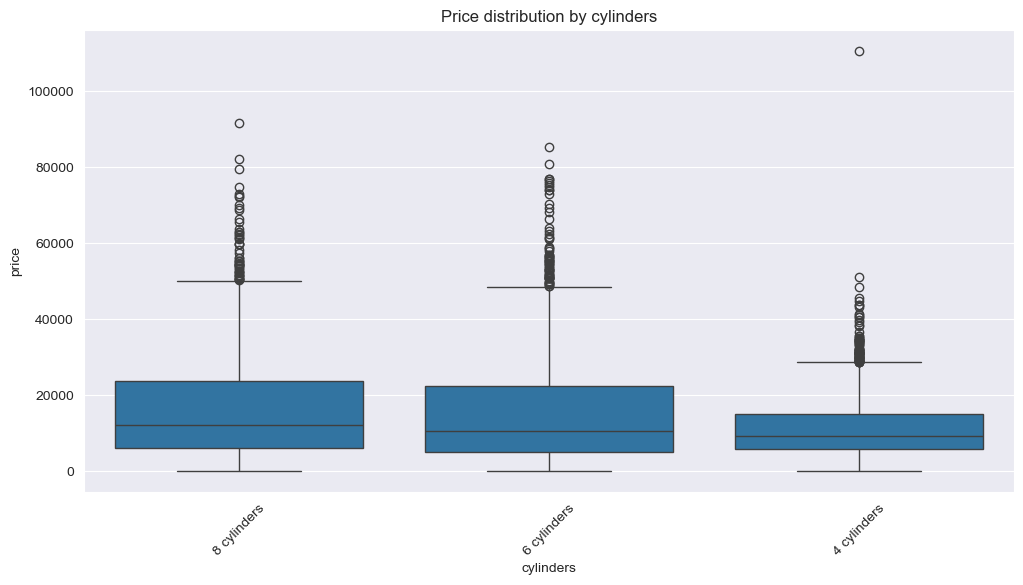

Kruskal-Wallis H-statistic: 168.93574580187553, p-value: 2.0704698037136816e-37


In [21]:
dataset['cylinders'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='cylinders', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by cylinders')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('cylinders')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

## Price vs. Condition

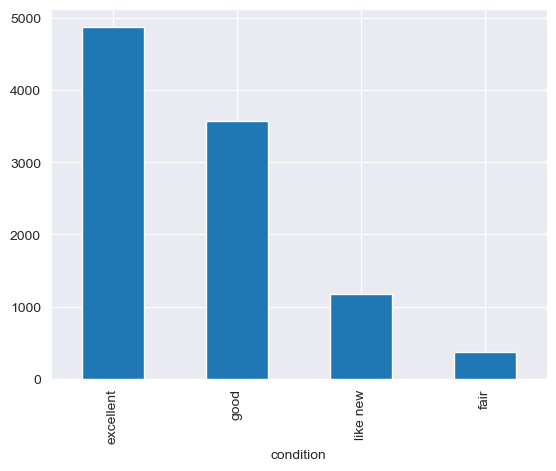

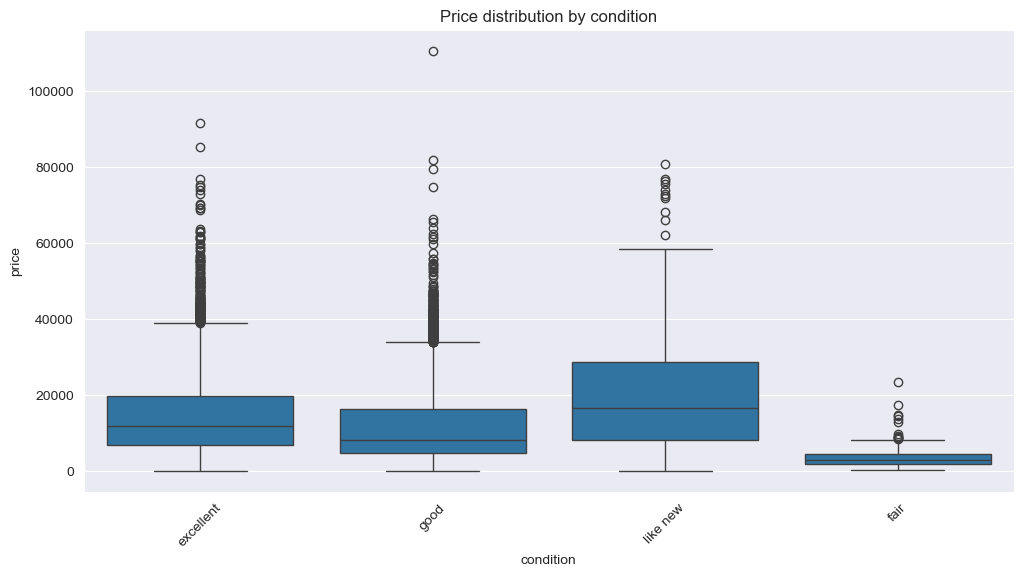

Kruskal-Wallis H-statistic: 954.5616276802747, p-value: 1.2938160466623214e-206


In [22]:
dataset['condition'].value_counts().plot(kind='bar')

plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=dataset)
plt.xticks(rotation=45)
plt.title('Price distribution by condition')
plt.show()

groups = [group['price'].values for name, group in dataset.groupby('condition')]
h_stat, p_val = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {h_stat}, p-value: {p_val}")

In [23]:
dataset.fillna({'odometer': -1}, inplace=True)
dataset = dataset.astype({'year': 'int64', 'odometer': 'int64'})
dataset = dataset[dataset['odometer'] >= 0]

X = dataset[['year', 'odometer', 'F1', 'F2', 'F3']]
y = dataset['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     635.9
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:13:28   Log-Likelihood:                -99508.
No. Observations:                9330   AIC:                         1.990e+05
Df Residuals:                    9324   BIC:                         1.991e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.851e+05   5.55e+04    -14.138      0.0

In [24]:
model = smf.ols('price ~ C(transmission) + C(cylinders) + C(condition) + C(type) + C(paint_color) + C(F4)', data=dataset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        11:13:28   Log-Likelihood:                -99788.
No. Observations:                9330   AIC:                         1.996e+05
Df Residuals:                    9314   BIC:                         1.997e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [25]:
print(dataset.groupby('transmission')['price'].mean())
print(dataset.groupby('cylinders')['price'].mean())
print(dataset.groupby('condition')['price'].mean())
print(dataset.groupby('type')['price'].mean())
print(dataset.groupby('paint_color')['price'].mean())

transmission
automatic    14661.052406
manual       11509.153361
Name: price, dtype: float64
cylinders
4 cylinders    11072.217866
6 cylinders    15479.271819
8 cylinders    16745.670675
Name: price, dtype: float64
condition
excellent    15094.419255
fair          3709.930380
good         13016.731077
like new     19663.689873
Name: price, dtype: float64
type
SUV       12630.541364
pickup    19820.378750
sedan      9013.893018
truck     18816.910953
Name: price, dtype: float64
paint_color
black     15479.561495
blue      13946.682812
red       14754.143639
silver    12358.232886
white     15018.013560
Name: price, dtype: float64


# CEO

“The dataset describes conditions of various used cars
and their current prices. I would like to learn what drives price of a used
car. Look at the dataset and find the main factors that affect the value of
a car – and then explain it to me. Additionally, assess the impact of some
special modifications (denoted as F1, F2, F3 and F4 in your dataset) on the
price. This would help us to understand, if we should make the modifications
before selling a car or not. I would like to see a report, describing your main
findings, on my desk, by Friday, March 28.”

> Hint: You are asked to find general trends in the data. Report whatever you think is the
most important. Your CEO doesn’t want to see a list that is 20-items long. She would like
to learn just about some “general trends”. To give you an example, one general trend could
be: “The price decrease with the age of the car. Holding all other factors constant, with
each year, the price of a car decreases by \\$570. However, that dynamics is not constant.
Value of a younger cars decreases faster than the value of an old car. For example, the
value of cars that are less than 5 years old, decreases nearly \\$2,500 per year.”
> (This is just an example, your numbers might be different).
>
> Your second task you have to check both, the impact and the statistical significance of the F1–F4 attributes for making the price
predictions.


# General trends in the data

### Price vs. Year:
There is significant negative correlation between year and price. The older the car the lower the price. Price of the car decreases by average \\$425 dollars per year.

### Price vs Odometer:
There is significant negative correlation between odometer and price. The more the car has run on the road the lower the price. Price of the car decreases by average \\$0.0478 cents per mile. So if the car has run 1000 miles the price will decrease by \\$47.8.

### Price vs. Manufacturer:
Can't state clear as Ford is the most popular in provided dataset. Reasoning based on this can introduce bias

### Price vs. Color:
We can observe increase in the used car price based on color. Black, blue and red cars are slightly more expensive than other colors. On average black cars are around \\$1500 more expensive, while red and blue cars are around \\$1100 more expensive than other colors.

### Price vs. Type:
Trucks and pickups are more expensive than other types of cars. On average trucks and pickups are $7000 more expensive than other types of cars.

### Price vs. Transmission:
Automatic transmission cars are more expensive than manual ones. On average automatic transmission cars are $1000 more expensive than manual ones.

### Price vs Cylinders:
4-cylinder cars are more expensive than 6-cylinder cars. On average 4-cylinder cars are \\$200 more expensive than 6-cylinder cars. 8-cylinder cars are the most expensive ones. On average 8-cylinder cars are \\$1400 more expensive than 4-cylinder cars.

### Price vs Condition:
It's best to sell a car with 'excellent' or 'like new' condition. On average cars in 'excellent' condition are \\$3000 more expensive than cars in 'good' condition. Cars in 'like new' condition are \\$6000 more expensive than cars in 'good' condition.

# F1, F2, F3 and F4 impact on price

F1 and F3 factors have positive impact on price. F2 is strongly correlated to the year of the car and has small impact on price once isolated. F4 factor has negligible impact on price.


# Technical Manager

“I would like you to propose a predictive
model, that can be used to determine price of a used car. The problem is,
that the state-law demands, that this model must be easily interpretable.
It means, we are restricted only to simple models, like linear regression,
Ridge regression, LASSO, or Elastic Net. Additionally, we need to know,
how accurate the model is. You must choose the best model and report its
root means square error. Describe everything in your report. I will study it
carefully.”

> Hint:
In the most typical approach, you need to build three datasets: a training set,
a validation set and a test set. You will use validation set to determine the best model;
then you will use the test set to estimate the model accuracy. In your report you should
describe how you trained the models, how you selected the best one, and how you tested
its performance at the end.

In [26]:
df = pd.read_csv('data/used_car_dataset.csv')

In [27]:
labelEncoder = LabelEncoder()

df['manufacturer'] = labelEncoder.fit_transform(df['manufacturer'])
df['paint_color'] = labelEncoder.fit_transform(df['paint_color'])
df['transmission'] = labelEncoder.fit_transform(df['transmission'])
df['type'] = labelEncoder.fit_transform(df['type'])
df['cylinders'] = labelEncoder.fit_transform(df['cylinders'])
df['condition'] = labelEncoder.fit_transform(df['condition'])
df['F4'] = labelEncoder.fit_transform(df['F4'])

In [28]:
df.drop(columns=['fuel'], inplace=True)
df = df.loc[df['price'] < 200000]
df.dropna(inplace=True)
df['year'] = df['year'].astype(int)
df['odometer'] = df['odometer'].astype(int)

In [29]:
X = df.drop('price', axis=1)
y = df['price']

features_to_scale = ['F1', 'F2', 'F3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [30]:
alphas = [0.1, 1, 3, 5, 7, 9, 10, 13]

results = {}
best_model = None
best_model_name = None
lowest_rmse = float('inf')

In [31]:
lr = LinearRegression()
lr.fit(X_train_sub, y_train_sub)
y_val_pred = lr.predict(X_val)
rmse_lr = np.sqrt(mean_squared_error(y_val, y_val_pred))
results['LinearRegression'] = rmse_lr

if rmse_lr < lowest_rmse:
    lowest_rmse = rmse_lr
    best_model = lr
    best_model_name = 'LinearRegression'

for model_name, model_class in [('Ridge', Ridge), ('Lasso', Lasso), ('ElasticNet', ElasticNet)]:
    for alpha in alphas:
        model = model_class(alpha=alpha, random_state=42)
        model.fit(X_train_sub, y_train_sub)
        y_val_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        results[f"{model_name}_alpha_{alpha}"] = rmse
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            best_model = model
            best_model_name = f"{model_name}_alpha_{alpha}"

In [32]:
print("Validation RMSE results:")
for key, value in results.items():
    print(f"{key}: {value:.2f}")

Validation RMSE results:
LinearRegression: 9004.45
Ridge_alpha_0.1: 9004.46
Ridge_alpha_1: 9004.63
Ridge_alpha_3: 9004.99
Ridge_alpha_5: 9005.35
Ridge_alpha_7: 9005.72
Ridge_alpha_9: 9006.10
Ridge_alpha_10: 9006.28
Ridge_alpha_13: 9006.86
Lasso_alpha_0.1: 9004.48
Lasso_alpha_1: 9004.77
Lasso_alpha_3: 9005.42
Lasso_alpha_5: 9006.08
Lasso_alpha_7: 9006.73
Lasso_alpha_9: 9007.41
Lasso_alpha_10: 9007.76
Lasso_alpha_13: 9008.84
ElasticNet_alpha_0.1: 9059.68
ElasticNet_alpha_1: 9329.19
ElasticNet_alpha_3: 9617.39
ElasticNet_alpha_5: 9757.04
ElasticNet_alpha_7: 9840.21
ElasticNet_alpha_9: 9896.06
ElasticNet_alpha_10: 9917.80
ElasticNet_alpha_13: 9967.77


In [33]:
print(f"\nBest model on validation set: {best_model_name} with RMSE = {lowest_rmse:.2f}")

X_train_val = pd.concat([X_train_sub, X_val])
y_train_val = pd.concat([y_train_sub, y_val])
best_model.fit(X_train_val, y_train_val)

y_test_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"\nTest RMSE: {test_rmse:.2f}")
print(f"Model accuracy: {best_model.score(X_test, y_test) * 100:.2f}%")


Best model on validation set: LinearRegression with RMSE = 9004.45

Test RMSE: 9631.48
Model accuracy: 36.92%


# Senior Developer

“My task is to deploy your model to production. But I can not deploy a paper-report. I need your
code. However, remember that I’m not a Data Scientist like you – I have a
different expertise. I will read your code, but you should make sure that I
can follow and understand it – and that I know how to use it.”

> Hint:
In the ideal case, people should be able to take your code, run it, and recreate all
your results. In a less-ideal case, there should be at least a demonstration of a “typical run”,
demonstrating one selected end-to-end case. Other name for this is a “technical demo”. At
your future work, you might be quite often asked to “demo your results”. People will expect
you to present an end-to-end example, where you read the raw data, train your model and
evaluate the results of the predictions.
